<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

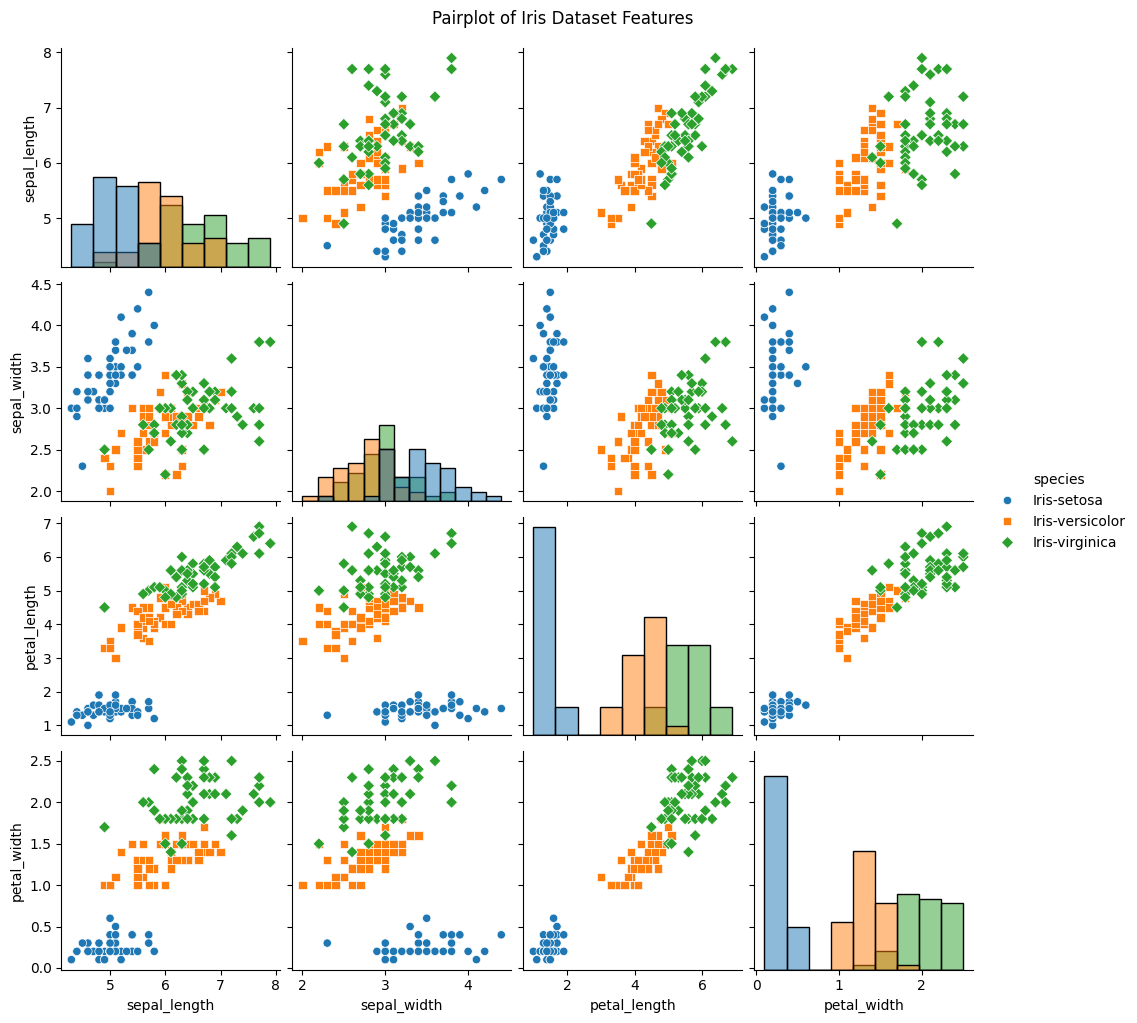

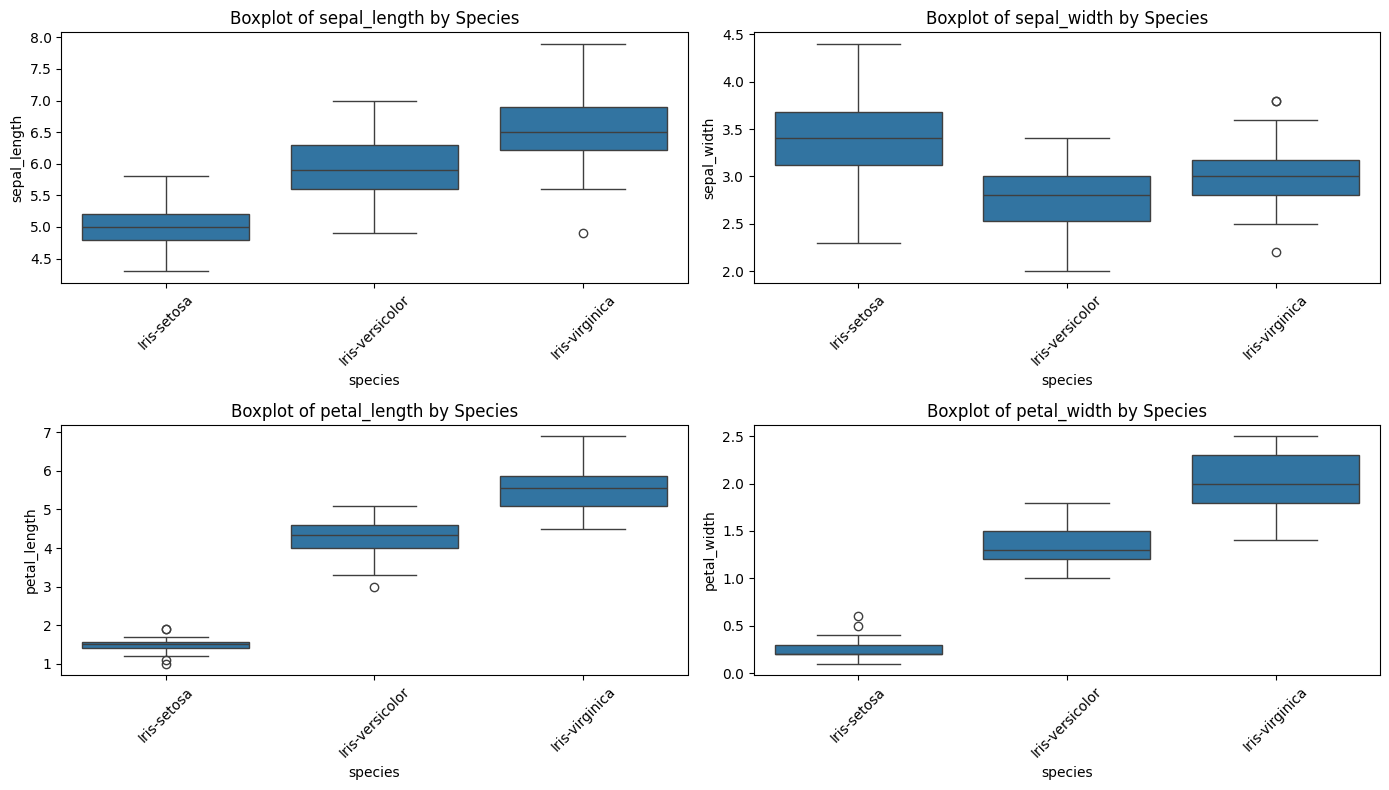

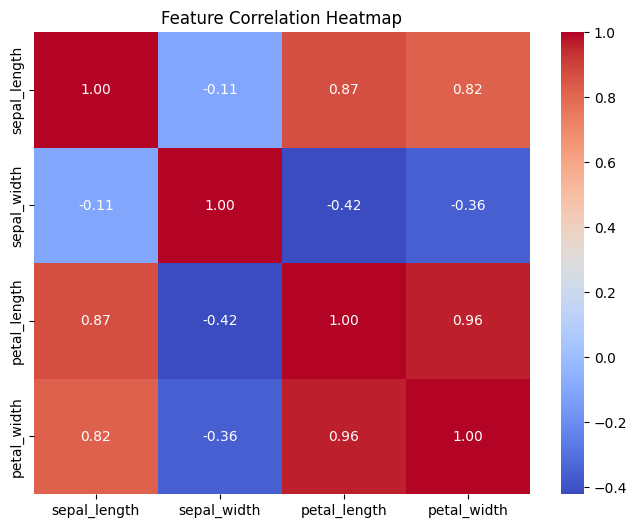

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv('iris.data', header=None, names=iris_columns)

# Info dan deskripsi dataset
print(iris_df.info())
print(iris_df.describe())

# Pairplot untuk melihat hubungan antar fitur
sns.pairplot(iris_df, hue='species', diag_kind='hist', markers=['o', 's', 'D'])
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
plt.show()

# Boxplot untuk distribusi fitur per spesies
plt.figure(figsize=(14, 8))
for i, column in enumerate(iris_columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=iris_df)
    plt.title(f"Boxplot of {column} by Species")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap untuk korelasi fitur numerik
correlation_matrix = iris_df.iloc[:, :-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Import libraries
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# Load dataset
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv('iris.data', header=None, names=iris_columns)

# Encode target variable
label_encoder = LabelEncoder()
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])

# Split data
X = iris_df.iloc[:, :-2].values  # Selecting first four numerical columns
y = iris_df['species_encoded'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define pipelines for Logistic Regression, Decision Tree, k-NN, and XGBoost
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(random_state=42))
    ]),
    'Decision Tree': Pipeline([
        ('dt', DecisionTreeClassifier(random_state=42))
    ]),
    'k-NN': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    'XGBoost': Pipeline([
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ])
}

# Train and evaluate models
results = {}
for model_name, pipeline in pipelines.items():
    # Fit the model
    pipeline.fit(X_train, y_train)
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    # Save classification report
    results[model_name] = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Display results
for model_name, metrics in results.items():
    print(f"Classification Report for {model_name}:")
    print(pd.DataFrame(metrics).transpose())
    print("\n")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:54:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for Logistic Regression:
                 precision    recall  f1-score    support
Iris-setosa       1.000000  1.000000  1.000000  10.000000
Iris-versicolor   0.900000  0.900000  0.900000  10.000000
Iris-virginica    0.900000  0.900000  0.900000  10.000000
accuracy          0.933333  0.933333  0.933333   0.933333
macro avg         0.933333  0.933333  0.933333  30.000000
weighted avg      0.933333  0.933333  0.933333  30.000000


Classification Report for Decision Tree:
                 precision    recall  f1-score    support
Iris-setosa       1.000000  1.000000  1.000000  10.000000
Iris-versicolor   0.900000  0.900000  0.900000  10.000000
Iris-virginica    0.900000  0.900000  0.900000  10.000000
accuracy          0.933333  0.933333  0.933333   0.933333
macro avg         0.933333  0.933333  0.933333  30.000000
weighted avg      0.933333  0.933333  0.933333  30.000000


Classification Report for k-NN:
                 precision    recall  f1-score    support
Iris-s

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings

# Suppress warnings from XGBoost
warnings.filterwarnings("ignore", category=UserWarning)

# Load dataset
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv('iris.data', header=None, names=iris_columns)

# Encode target variable
label_encoder = LabelEncoder()
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])

# Split data
X = iris_df.iloc[:, :-2].values  # Selecting first four numerical columns
y = iris_df['species_encoded'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define pipelines for Logistic Regression, Decision Tree, k-NN, and XGBoost
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(random_state=42))
    ]),
    'Decision Tree': Pipeline([
        ('dt', DecisionTreeClassifier(random_state=42))
    ]),
    'k-NN': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    'XGBoost': Pipeline([
        ('xgb', XGBClassifier(eval_metric='mlogloss', random_state=42))
    ])
}

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'log_reg__C': [0.01, 0.1, 1, 10, 100],
        'log_reg__solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree': {
        'dt__max_depth': [None, 3, 5, 10],
        'dt__min_samples_split': [2, 5, 10]
    },
    'k-NN': {
        'knn__n_neighbors': [3, 5, 7, 9],
        'knn__weights': ['uniform', 'distance']
    },
    'XGBoost': {
        'xgb__n_estimators': [50, 100, 200],
        'xgb__max_depth': [3, 5, 10]
    }
}

# Perform GridSearchCV for each model
best_params = {}
for model_name, pipeline in pipelines.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    best_params[model_name] = {
        'Best Params': grid_search.best_params_,
        'Best Score': grid_search.best_score_
    }

# Display results of tuning
print("\nHyperparameter Tuning Results:\n")
for model_name, result in best_params.items():
    print(f"{model_name}")
    print(f"- Best Parameters: {result['Best Params']}")
    print(f"- Best Cross-Validated Accuracy: {result['Best Score']:.4f}\n")


Tuning Logistic Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuning Decision Tree...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Tuning k-NN...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tuning XGBoost...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

Hyperparameter Tuning Results:

Logistic Regression
- Best Parameters: {'log_reg__C': 10, 'log_reg__solver': 'lbfgs'}
- Best Cross-Validated Accuracy: 0.9583

Decision Tree
- Best Parameters: {'dt__max_depth': None, 'dt__min_samples_split': 5}
- Best Cross-Validated Accuracy: 0.9583

k-NN
- Best Parameters: {'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
- Best Cross-Validated Accuracy: 0.9583

XGBoost
- Best Parameters: {'xgb__max_depth': 3, 'xgb__n_estimators': 50}
- Best Cross-Validated Accuracy: 0.9583




Tuning Results for Classification Models:
                 Model                                    Best Parameters  \
0  Logistic Regression     {'log_reg__C': 10, 'log_reg__solver': 'lbfgs'}   
1        Decision Tree  {'dt__max_depth': None, 'dt__min_samples_split...   
2                 k-NN  {'knn__n_neighbors': 3, 'knn__weights': 'unifo...   
3              XGBoost     {'xgb__max_depth': 3, 'xgb__n_estimators': 50}   

   Cross-Validated Accuracy  
0                  0.958333  
1                  0.958333  
2                  0.958333  
3                  0.958333  


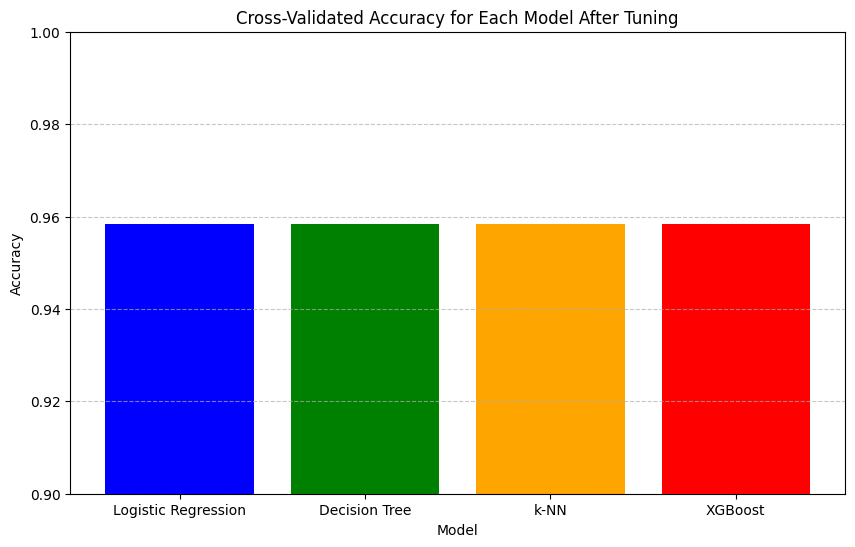

In [ ]:
# Check and handle missing models in best_params
models = ["Logistic Regression", "Decision Tree", "k-NN", "XGBoost"]
missing_models = [model for model in models if model not in best_params]

if missing_models:
    print(f"Warning: The following models are missing from best_params: {missing_models}")
else:
    # Prepare tuning results for the report
    tuning_results = {
        "Model": ["Logistic Regression", "Decision Tree", "k-NN", "XGBoost"],
        "Best Parameters": [
            best_params["Logistic Regression"]["Best Params"],
            best_params["Decision Tree"]["Best Params"],
            best_params["k-NN"]["Best Params"],
            best_params["XGBoost"]["Best Params"],
        ],
        "Cross-Validated Accuracy": [
            best_params["Logistic Regression"]["Best Score"],
            best_params["Decision Tree"]["Best Score"],
            best_params["k-NN"]["Best Score"],
            best_params["XGBoost"]["Best Score"],
        ],
    }

    # Convert results to DataFrame for display
    tuning_results_df = pd.DataFrame(tuning_results)

    # Display the tuning results in the notebook
    print("\nTuning Results for Classification Models:")
    print(tuning_results_df)

    # Visualization of Cross-Validated Accuracy
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.bar(
        tuning_results["Model"],
        tuning_results["Cross-Validated Accuracy"],
        color=["blue", "green", "orange", "red"],
    )
    plt.ylim(0.9, 1.0)
    plt.title("Cross-Validated Accuracy for Each Model After Tuning")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Contoh membaca dataset dalam mode chunk untuk efisiensi
chunk_size = 100000  # Baca dataset dalam chunk
file_path = 'RegresiUTSTelkom.csv'

scaled_chunks = []  # Untuk menyimpan hasil scaling per chunk

# Pilih scaler yang diinginkan
scaler = StandardScaler()  # Atau gunakan MinMaxScaler()

# Scaling dilakukan dalam chunk
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    numeric_columns = chunk.select_dtypes(include=['float64', 'int64']).columns
    chunk[numeric_columns] = scaler.fit_transform(chunk[numeric_columns])
    scaled_chunks.append(chunk)

# Gabungkan kembali hasil chunk menjadi satu DataFrame
scaled_dataset = pd.concat(scaled_chunks)

# Simpan dataset yang sudah di-scaling jika diperlukan
scaled_dataset.to_csv('hasil_scalling.csv', index=False)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
import pandas as pd

df = pd.read_csv("hasil_scalling.csv")
print(df.describe())


               2001      49.94357      21.47114       73.0775       8.74861  \
count  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05   
mean   4.811038e-15 -1.471427e-16 -3.970868e-18  2.062645e-17  4.798132e-18   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -7.002279e+00 -6.870472e+00 -6.617731e+00 -8.748273e+00 -9.515915e+00   
25%   -3.757030e-01 -5.656553e-01 -5.302916e-01 -5.701221e-01 -5.913112e-01   
50%    3.233070e-01  1.432752e-01  1.380964e-01  5.149638e-02 -1.112976e-01   
75%    6.969691e-01  7.329747e-01  6.750792e-01  5.981415e-01  4.672811e-01   
max    1.142427e+00  3.104342e+00  7.463892e+00  8.921205e+00  2.042947e+01   

          -17.40628     -13.09905     -25.01202     -12.23257       7.83089  \
count  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05   
mean   2.372869e-17 -9.816868e-17  2.206038e-19 -2.090221e-17 -1.050626e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.

Statistik Deskriptif:
               2001      49.94357      21.47114       73.0775       8.74861  \
count  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05   
mean   4.811038e-15 -1.471427e-16 -3.970868e-18  2.062645e-17  4.798132e-18   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -7.002279e+00 -6.870472e+00 -6.617731e+00 -8.748273e+00 -9.515915e+00   
25%   -3.757030e-01 -5.656553e-01 -5.302916e-01 -5.701221e-01 -5.913112e-01   
50%    3.233070e-01  1.432752e-01  1.380964e-01  5.149638e-02 -1.112976e-01   
75%    6.969691e-01  7.329747e-01  6.750792e-01  5.981415e-01  4.672811e-01   
max    1.142427e+00  3.104342e+00  7.463892e+00  8.921205e+00  2.042947e+01   

          -17.40628     -13.09905     -25.01202     -12.23257       7.83089  \
count  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05   
mean   2.372869e-17 -9.816868e-17  2.206038e-19 -2.090221e-17 -1.050626e-17   
std    1.000001e+00  1.000001

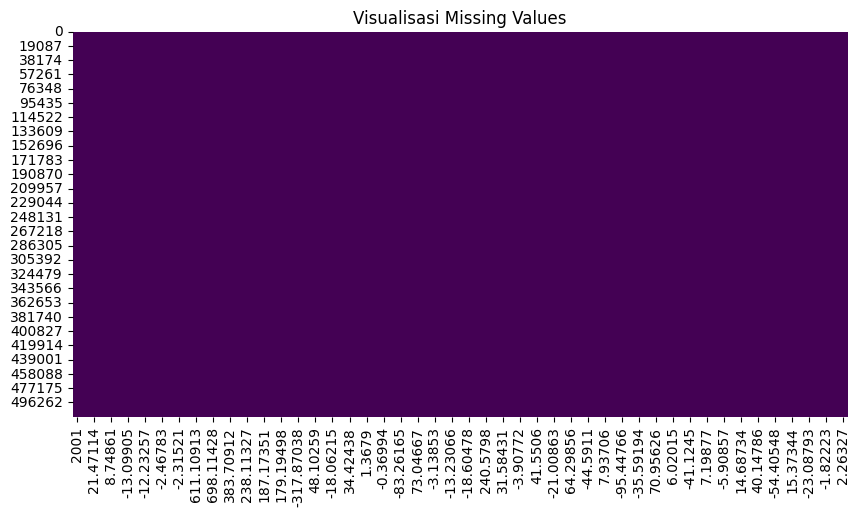


Visualisasi Distribusi Kolom:


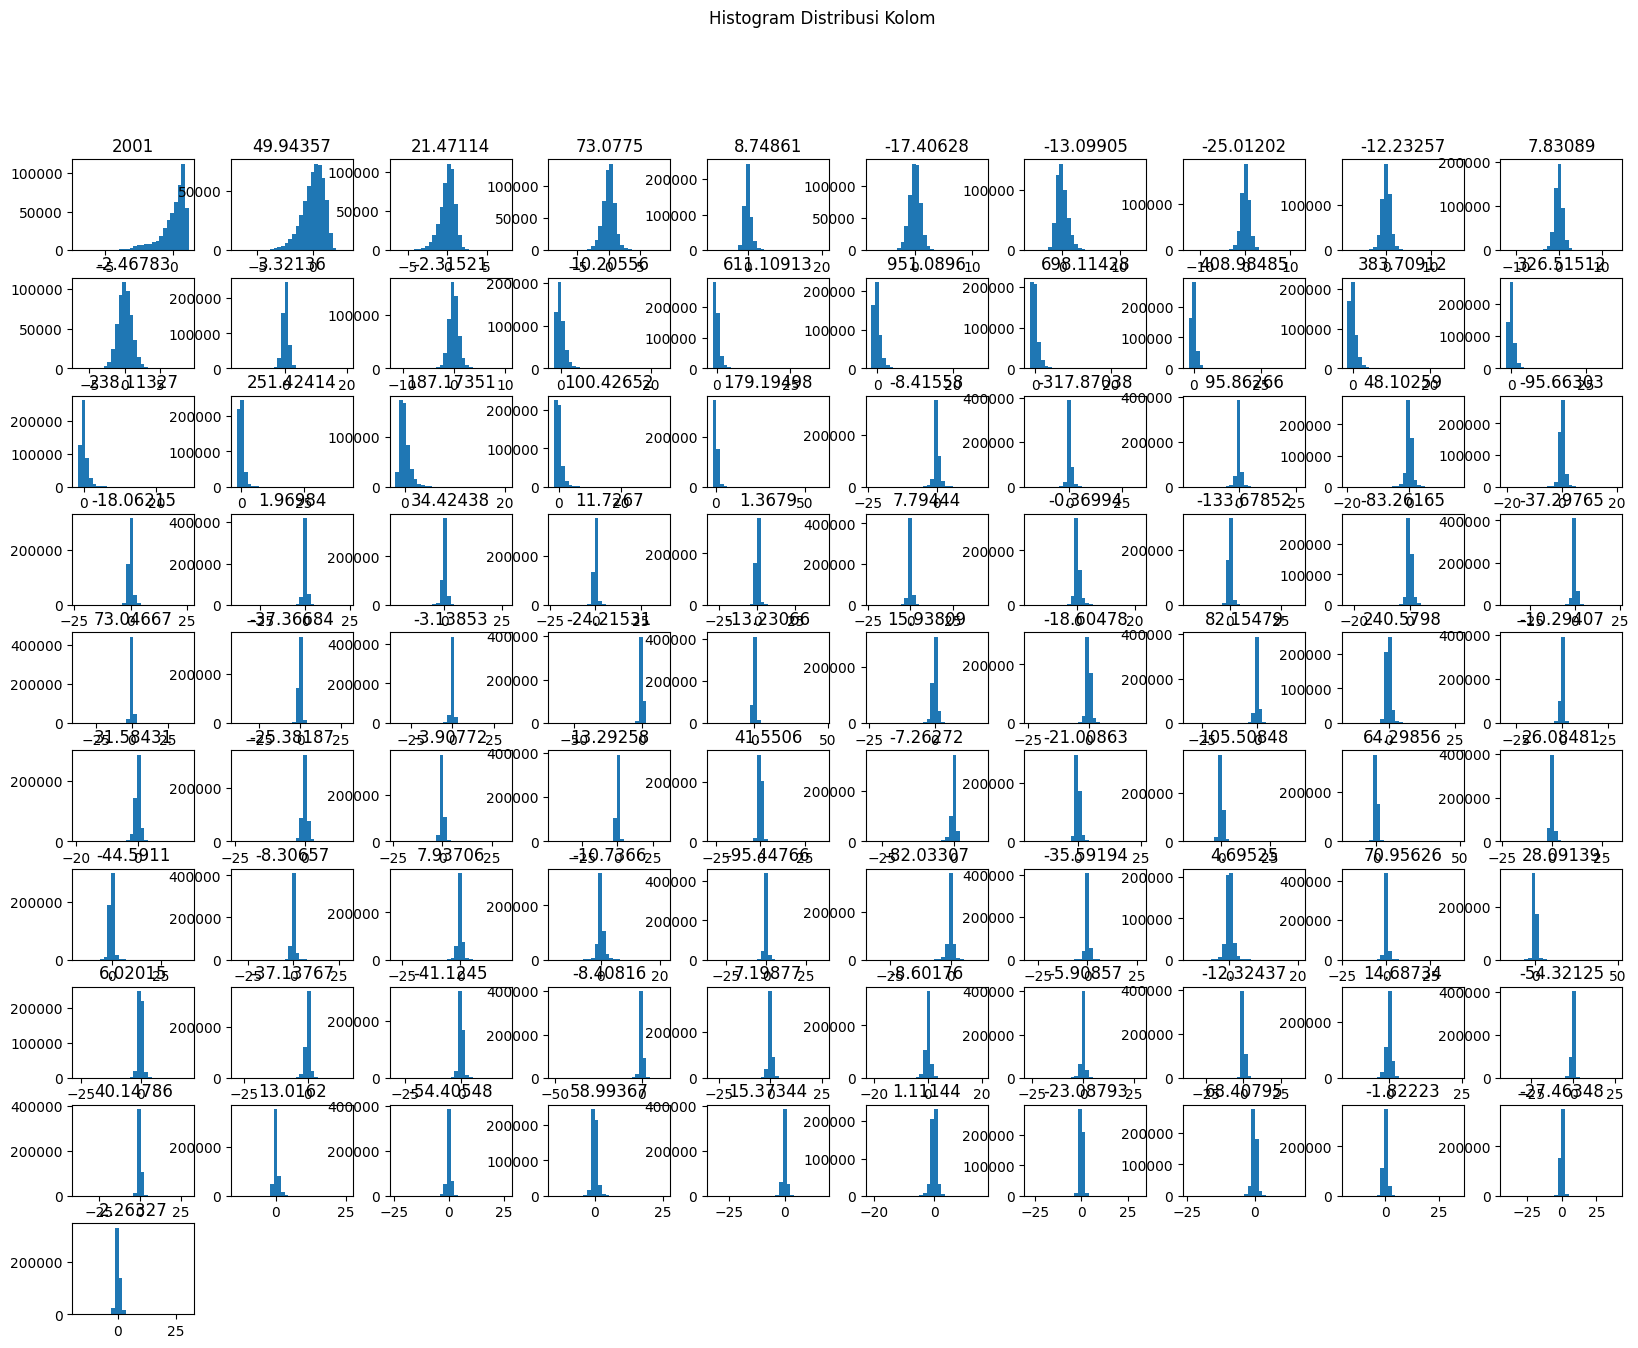


Visualisasi Outlier dengan Boxplot:


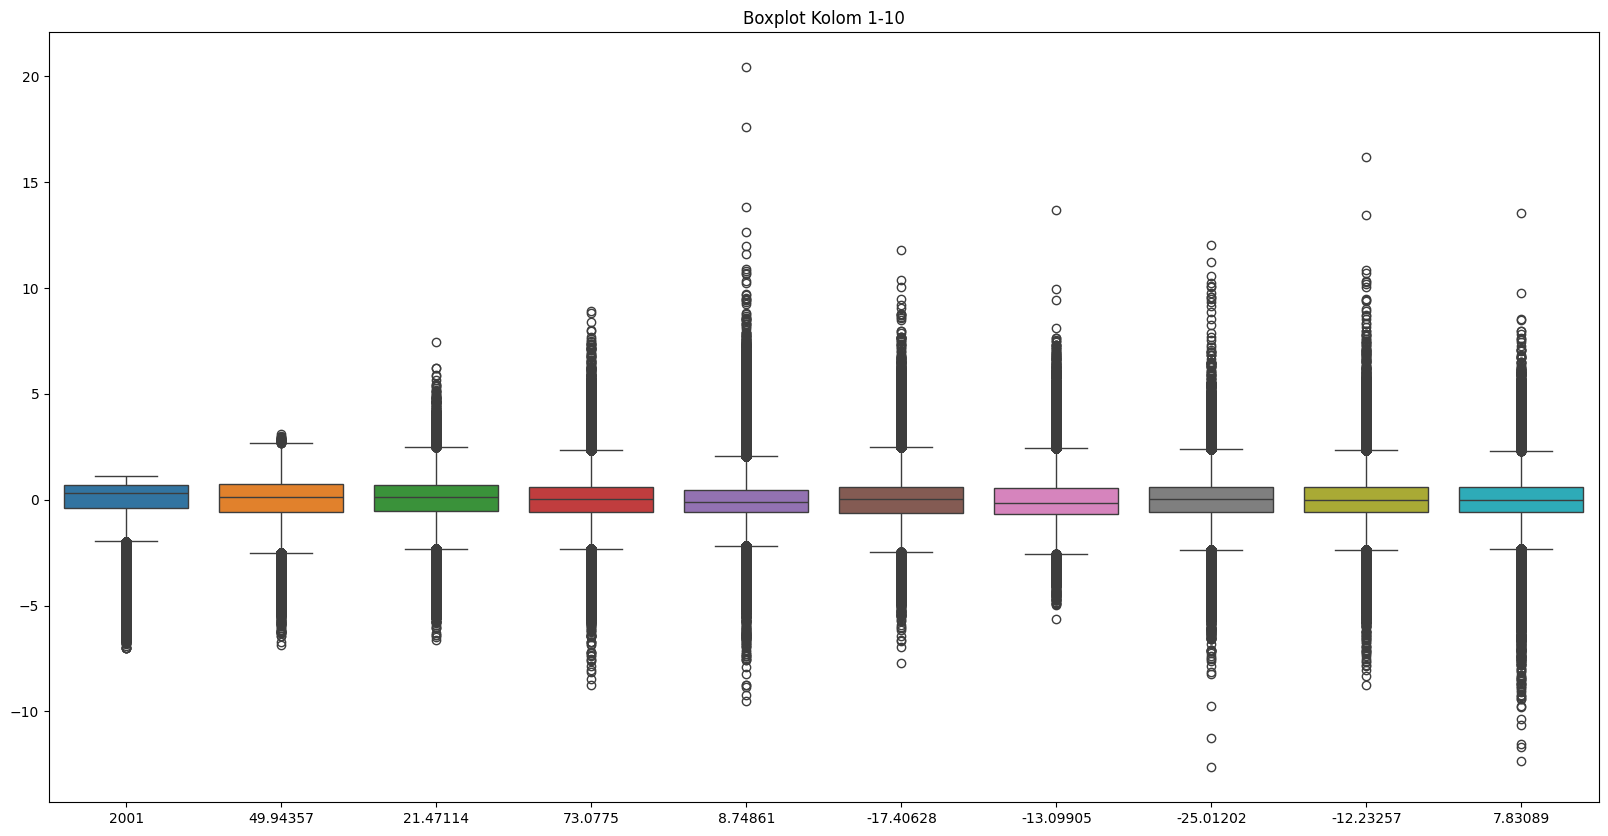


Heatmap Korelasi Variabel:


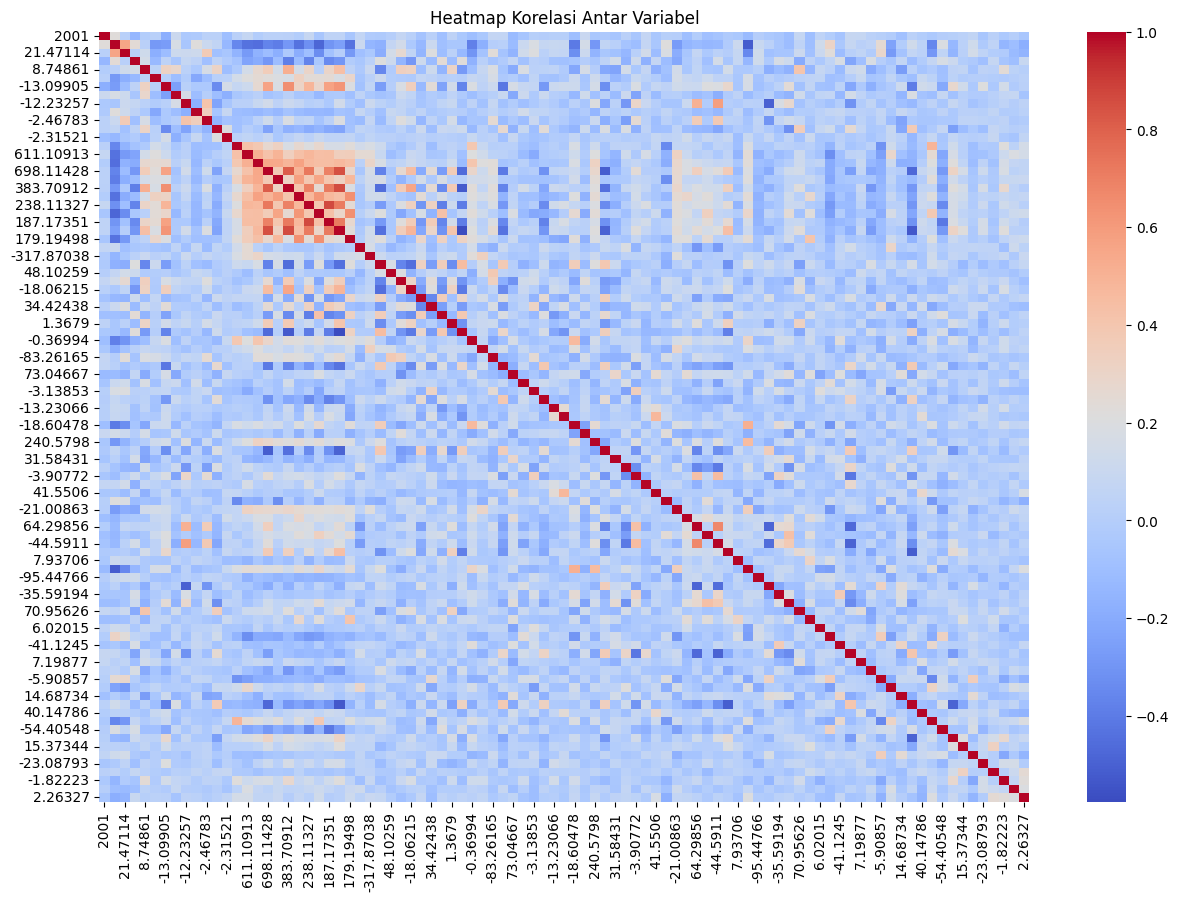


Top 5 Korelasi Tinggi di Dataset:
238.11327  187.17351    0.865610
187.17351  238.11327    0.865610
100.42652  383.70912    0.859681
383.70912  100.42652    0.859681
100.42652  698.11428    0.846761
dtype: float64

Tidak ada kolom kategorikal yang terdeteksi.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
file_path = 'hasil_scalling.csv'  # Ganti dengan path file Anda
df = pd.read_csv(file_path)

# 1. Statistik Deskriptif
print("Statistik Deskriptif:")
print(df.describe())

# 2. Deteksi Missing Values
print("\nJumlah Missing Values di setiap kolom:")
print(df.isnull().sum())

# Visualisasi Missing Values (Jika Ada)
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisasi Missing Values")
plt.show()

# 3. Visualisasi Distribusi (Histogram)
print("\nVisualisasi Distribusi Kolom:")
df.hist(figsize=(20, 15), bins=30, grid=False)
plt.suptitle("Histogram Distribusi Kolom")
plt.show()

# 4. Deteksi Outlier (Boxplot)
print("\nVisualisasi Outlier dengan Boxplot:")
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.iloc[:, :10])  # Boxplot untuk 10 kolom pertama
plt.title("Boxplot Kolom 1-10")
plt.show()

# 5. Korelasi Antar Variabel (Heatmap)
print("\nHeatmap Korelasi Variabel:")
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# 6. Analisis Korelasi (Top 5 variabel berkorelasi tinggi)
print("\nTop 5 Korelasi Tinggi di Dataset:")
correlation_matrix = df.corr().unstack().sort_values(ascending=False)
high_correlation = correlation_matrix[(correlation_matrix < 1) & (correlation_matrix > 0.8)]
print(high_correlation.head(5))

# 7. Analisis Data Kategorikal (Jika Ada)
categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print("\nDistribusi Kolom Kategorikal:")
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col)
        plt.title(f"Distribusi {col}")
        plt.show()
else:
    print("\nTidak ada kolom kategorikal yang terdeteksi.")

# 8. Simpan Output Statistik Deskriptif ke CSV (Opsional)
df.describe().to_csv("statistik_deskriptif.csv", index=False)


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("RegresiUTSTelkom.csv")  # Ganti dengan path file dataset Anda
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset loaded with 515344 rows and 91 columns.


In [6]:
# Sampling 10% of the dataset
sampled_df = df.sample(frac=0.1, random_state=42)
print(f"Original dataset size: {len(df)}")
print(f"Sampled dataset size: {len(sampled_df)}")

# Save the sampled dataset
sampled_df.to_csv("sample.csv", index=False)


Original dataset size: 515344
Sampled dataset size: 51534


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA to reduce dimensions
pca = PCA(n_components=10)  # Keep 10 principal components
reduced_data = pca.fit_transform(scaled_data)

# Convert to DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(10)])

# Save the reduced dataset
reduced_df.to_csv("sample2.csv", index=False)


In [10]:
import pandas as pd

# Load the dataset provided by the user
file_path = 'sample2.csv'
df = pd.read_csv(file_path)

# Display the basic information and the first few rows of the dataset for overview
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC1     515344 non-null  float64
 1   PC2     515344 non-null  float64
 2   PC3     515344 non-null  float64
 3   PC4     515344 non-null  float64
 4   PC5     515344 non-null  float64
 5   PC6     515344 non-null  float64
 6   PC7     515344 non-null  float64
 7   PC8     515344 non-null  float64
 8   PC9     515344 non-null  float64
 9   PC10    515344 non-null  float64
dtypes: float64(10)
memory usage: 39.3 MB


(None,
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 0 -2.768046  0.960180 -0.158742 -0.984674  0.066239  0.050808  0.834604   
 1 -3.015811 -1.534502  0.620291 -0.842639 -0.691722  0.771443 -0.418905   
 2 -3.319293  0.299109 -1.154103 -0.454820 -1.349011 -0.542346 -0.223256   
 3 -3.605674 -0.014246  0.113274 -0.843902 -1.362012  0.058722  0.562275   
 4 -3.171119 -0.582208  0.306399 -0.027111 -1.121465  0.869949  0.116290   
 
         PC8       PC9      PC10  
 0  0.302555 -0.598721  1.071040  
 1  0.300546  0.781325 -0.507359  
 2 -0.175270 -0.384795 -0.792057  
 3 -0.198611 -0.735520  0.024753  
 4  0.983502 -0.342304 -0.863643  )

Statistik Deskriptif Dataset:
                PC1           PC2           PC3           PC4           PC5  \
count  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05   
mean   9.265359e-18  1.974404e-17  2.206038e-19 -4.853283e-17  3.364208e-17   
std    3.217808e+00  2.650803e+00  2.310210e+00  1.945853e+00  1.837417e+00   
min   -6.308162e+00 -4.204427e+01 -2.300647e+01 -3.447907e+01 -2.359113e+01   
25%   -2.196198e+00 -1.436420e+00 -1.060771e+00 -1.062932e+00 -8.888993e-01   
50%   -6.564228e-01 -4.266281e-01  2.204794e-01  7.938673e-03 -5.804805e-02   
75%    1.400166e+00  9.823030e-01  1.271130e+00  1.173463e+00  8.855780e-01   
max    8.591453e+01  4.925208e+01  7.085874e+01  3.046174e+01  5.427129e+01   

                PC6           PC7           PC8           PC9          PC10  
count  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05  5.153440e+05  
mean  -2.095736e-18  5.515095e-19  2.757547e-18 -2.603125e-17 -2.785123e-17  
std    1.588355e+00  1.4

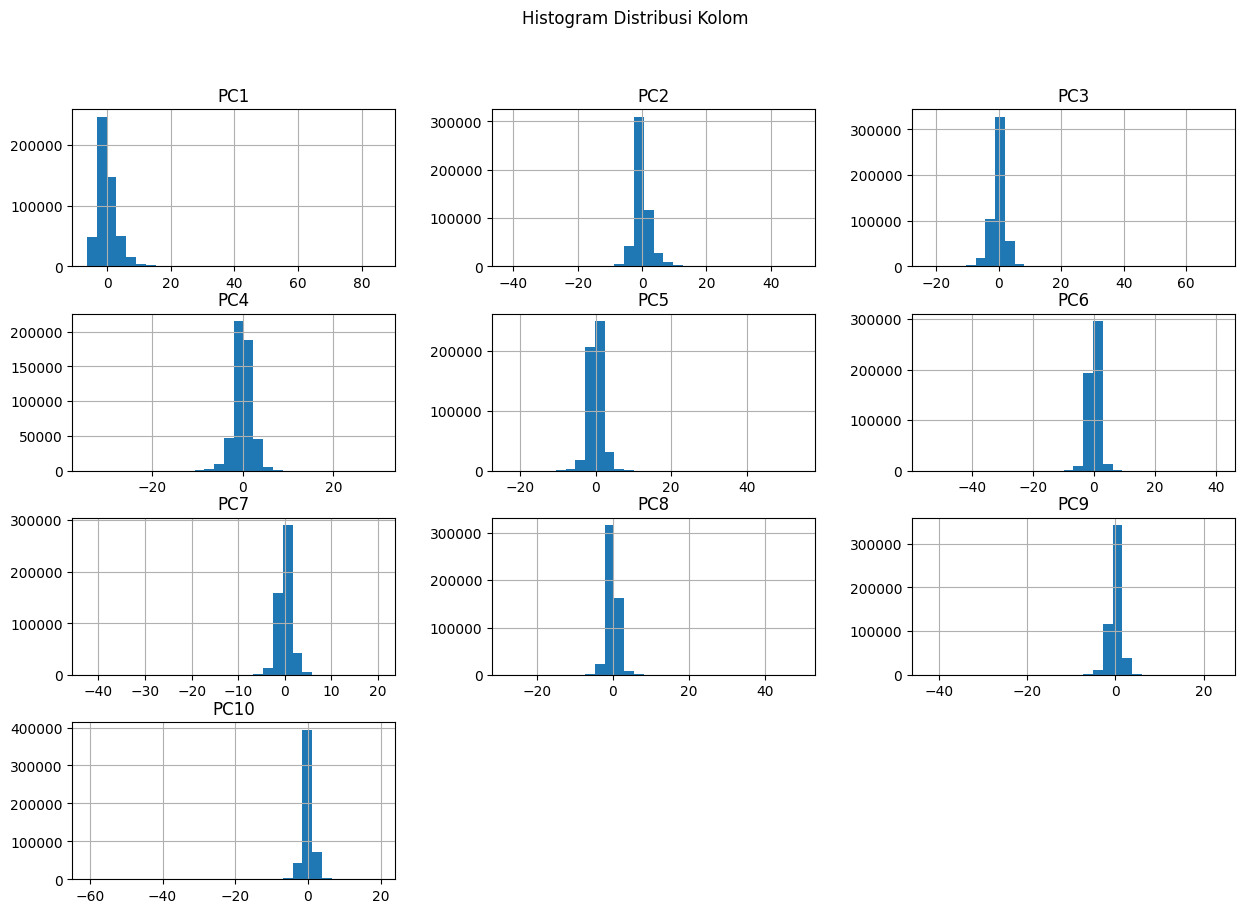

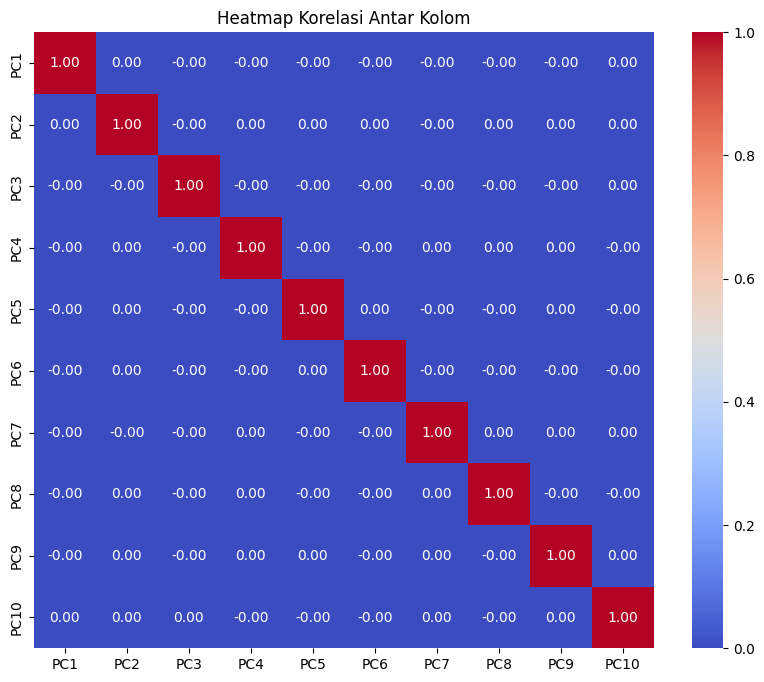

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik deskriptif
print("Statistik Deskriptif Dataset:")
print(df.describe())

# Visualisasi distribusi setiap kolom
print("Visualisasi Distribusi Kolom:")
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Histogram Distribusi Kolom")
plt.show()

# Heatmap korelasi antar variabel
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Kolom")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Membagi data
X = df.drop(columns=["PC10"])  # Semua kolom kecuali target
y = df["PC10"]  # Target kolom terakhir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat pipeline untuk setiap model
pipelines = {
    "Polynomial Regression": Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('scaler', StandardScaler()),
        ('model', DecisionTreeRegressor())
    ]),
    "Decision Tree": Pipeline([
        ('scaler', StandardScaler()),
        ('model', DecisionTreeRegressor())
    ]),
    "k-NN": Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor())
    ]),
    "XGBoost": Pipeline([
        ('scaler', StandardScaler()),
        ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
    ])
}

# Fit setiap pipeline
for name, pipeline in pipelines.items():
    print(f"Training model: {name}")
    pipeline.fit(X_train, y_train)
    print(f"{name} trained successfully!")


Training model: Polynomial Regression
Polynomial Regression trained successfully!
Training model: Decision Tree
Decision Tree trained successfully!
Training model: k-NN
k-NN trained successfully!
Training model: XGBoost
XGBoost trained successfully!


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Hyperparameter tuning untuk Decision Tree
param_grid_tree = {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10]
}
grid_tree = GridSearchCV(pipelines["Decision Tree"], param_grid_tree, cv=3, scoring='r2')
grid_tree.fit(X_train, y_train)

# Evaluasi
best_tree = grid_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)
print("Best Params Decision Tree:", grid_tree.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R2 Score:", r2_score(y_test, y_pred_tree))


Best Params Decision Tree: {'model__max_depth': 10, 'model__min_samples_split': 10}
MSE: 1.5070192844028552
R2 Score: 0.17429894290870462


In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=["PC10"])  # PC10 sebagai target
y = df["PC10"]

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import pandas as pd

# Membagi dataset
X = df.drop(columns=["PC10"])  # Semua kolom kecuali target
y = df["PC10"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare results dictionary
results = {}

# Polynomial Regression Hyperparameter Tuning
polynomial_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor())
])

param_grid_poly = {
    'poly_features__degree': [2, 3, 4],  # Tuning degree polinomial
    'model__max_depth': [3, 5, 10],     # Tuning parameter Decision Tree
    'model__min_samples_split': [2, 5]
}
grid_poly = GridSearchCV(polynomial_pipeline, param_grid_poly, cv=3, scoring='r2')
grid_poly.fit(X_train, y_train)

# Evaluasi Polynomial Regression
best_poly = grid_poly.best_estimator_
y_pred_poly = best_poly.predict(X_test)
results['Polynomial Regression'] = {
    'Best Params': grid_poly.best_params_,
    'MSE': mean_squared_error(y_test, y_pred_poly),
    'R2': r2_score(y_test, y_pred_poly)
}

# Decision Tree Hyperparameter Tuning
decision_tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor())
])

param_grid_tree = {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10]
}
grid_tree = GridSearchCV(decision_tree_pipeline, param_grid_tree, cv=3, scoring='r2')
grid_tree.fit(X_train, y_train)

# Evaluasi Decision Tree
best_tree = grid_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)
results['Decision Tree'] = {
    'Best Params': grid_tree.best_params_,
    'MSE': mean_squared_error(y_test, y_pred_tree),
    'R2': r2_score(y_test, y_pred_tree)
}

# k-NN Hyperparameter Tuning
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 10],  # Jumlah tetangga
    'model__weights': ['uniform', 'distance'],  # Skema bobot
    'model__p': [1, 2]  # Manhattan (p=1) atau Euclidean (p=2)
}
grid_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=3, scoring='r2')
grid_knn.fit(X_train, y_train)

# Evaluasi k-NN
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
results['k-NN'] = {
    'Best Params': grid_knn.best_params_,
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2': r2_score(y_test, y_pred_knn)
}

# XGBoost Hyperparameter Tuning
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

param_grid_xgb = {
    'model__n_estimators': [100, 200, 500],  # Jumlah pohon
    'model__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'model__max_depth': [3, 5, 7],  # Kedalaman pohon
    'model__subsample': [0.8, 1.0]  # Rasio sampling data
}
grid_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=3, scoring='r2', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Evaluasi XGBoost
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
results['XGBoost'] = {
    'Best Params': grid_xgb.best_params_,
    'MSE': mean_squared_error(y_test, y_pred_xgb),
    'R2': r2_score(y_test, y_pred_xgb)
}

# Create Comparison Table
comparison_table = pd.DataFrame(results).T
comparison_table.reset_index(inplace=True)
comparison_table.columns = ['Model', 'Best Params', 'MSE', 'R2']

# Display the comparison table
import ace_tools as tools; tools.display_dataframe_to_user(name="Model Hyperparameter Tuning and Evaluation Report", dataframe=comparison_table)
